In [3]:
import os
import cv2
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [4]:
os.listdir('./data')

['00-12_10.jpg',
 '00-12_10.txt',
 '00-12_15.jpg',
 '00-12_15.txt',
 '00-12_8.jpg',
 '00-12_8.txt']

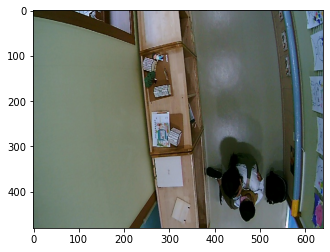

In [18]:
img = cv2.imread('./data/00-12_10.jpg', cv2.IMREAD_COLOR)
img = img[...,::-1]
plt.imshow(img)

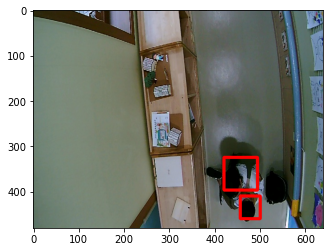

In [38]:
plt.imshow(img.astype(np.uint8))

In [44]:
df = []
for d in os.listdir('./data'):
    if 'jpg' in d:
        print(d)
        img = cv2.imread('./data/{}'.format(d))
        h, w, c = img.shape
        
        with open('./data/{}.txt'.format(d.split('.')[0]), 'r') as f:
            label = [[float(dd) for dd in d.rstrip().split(' ')] for d in f.readlines()]
        
        for l in label:
            pt1 = (int(l[1]*w)-int(l[3]*w)//2, int(l[2]*h)-int(l[4]*h)//2)
            pt2 = (int(l[1]*w)+int(l[3]*w)//2, int(l[2]*h)+int(l[4]*h)//2)
            
            df.append(['./data/{}.jpg'.format(d.split('.')[0]),
                       pt1[0], pt1[1], pt2[0], pt2[1], 'people'])

00-12_10.jpg
00-12_15.jpg
00-12_8.jpg


In [15]:
with open('./data/00-12_10.txt', 'r') as f:
    label = [[float(dd) for dd in d.rstrip().split(' ')] for d in f.readlines()]

In [16]:
label

[[0.0, 0.716016, 0.752083, 0.117969, 0.151389],
 [0.0, 0.749219, 0.905556, 0.06875, 0.105556]]

In [37]:
h, w, c = img.shape
print(h, w)
for l in label:
    print(int(l[1]*w), int(l[2]*h), int(l[3]*w), int(l[4]*h))
    pt1 = (int(l[1]*w)-int(l[3]*w)//2, int(l[2]*h)-int(l[4]*h)//2)
    pt2 = (int(l[1]*w)+int(l[3]*w)//2, int(l[2]*h)+int(l[4]*h)//2)
    img = cv2.rectangle(img.astype('float32'), pt1, pt2, (255, 0, 0), 5)

480 640
458 360 75 72
479 434 44 50


In [45]:
df

[['./data/00-12_10.jpg', 421, 324, 495, 396, 'people'],
 ['./data/00-12_10.jpg', 457, 409, 501, 459, 'people'],
 ['./data/00-12_15.jpg', 422, 329, 502, 409, 'people'],
 ['./data/00-12_15.jpg', 457, 397, 485, 443, 'people'],
 ['./data/00-12_8.jpg', 425, 321, 499, 405, 'people'],
 ['./data/00-12_8.jpg', 454, 398, 488, 454, 'people']]

In [52]:
pd.DataFrame(data=df).to_csv('./test.csv', index=False, header=False)

In [31]:
img.shape

(480, 640, 3)

In [51]:
pd.DataFrame(data=df)

0    1    2    3    4       5
0  ./data/00-12_10.jpg  421  324  495  396  people
1  ./data/00-12_10.jpg  457  409  501  459  people
2  ./data/00-12_15.jpg  422  329  502  409  people
3  ./data/00-12_15.jpg  457  397  485  443  people
4   ./data/00-12_8.jpg  425  321  499  405  people
5   ./data/00-12_8.jpg  454  398  488  454  people

In [41]:
h, w, c 

(480, 640, 3)

In [20]:
datalist = [d.split('.')[0] for d in os.listdir('./data') if 'jpg' in d]

In [21]:
datalist

['00-12_10', '00-12_15', '00-12_8']

In [42]:
label

[[0.0, 0.716016, 0.752083, 0.117969, 0.151389],
 [0.0, 0.749219, 0.905556, 0.06875, 0.105556]]